In [65]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Optional for interactive plots
import missingno as msno      # For missing data visualization
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

## EDA

In [61]:
# 2. Load Data
df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
# original_df = pd.read_csv('../dataset/training_extra.csv') # Replace with your file
print(f"Data shape: {df.shape}")
df.head()

Data shape: (300000, 11)


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [62]:

# 3. Basic Info
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,300000.0,NaN,NaN,NaN,149999.5,86602.684716,0.0,74999.75,149999.5,224999.25,299999.0
Brand,290295,5,Adidas,60077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Material,291653,4,Polyester,79630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,293405,3,Medium,101906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compartments,300000.0,NaN,NaN,NaN,5.44359,2.890766,1.0,3.0,5.0,8.0,10.0
Laptop Compartment,292556,2,Yes,148342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Waterproof,292950,2,Yes,148077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Style,292030,3,Messenger,100031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,290050,6,Pink,51690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight Capacity (kg),299862.0,NaN,NaN,NaN,18.029994,6.966914,5.0,12.097867,18.068614,24.002375,30.0


In [63]:

# 4. Missing Values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent', ascending=False)


,Missing Values,Percent
Color,9950,3.316667
Brand,9705,3.235000
Material,8347,2.782333
Style,7970,2.656667
Laptop Compartment,7444,2.481333
Waterproof,7050,2.350000
Size,6595,2.198333
Weight Capacity (kg),138,0.046000


In [64]:

# Visualize missing data
msno.matrix(df)
msno.heatmap(df)


KeyboardInterrupt: 

In [ ]:

# 5. Duplicate Rows
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [ ]:

# 6. Data Types & Unique Values
df.dtypes
df.nunique()


id                      300000
Brand                        5
Material                     4
Size                         3
Compartments                10
Laptop Compartment           2
Waterproof                   2
Style                        3
Color                        6
Weight Capacity (kg)    181596
Price                    48212
dtype: int64

KeyboardInterrupt: 

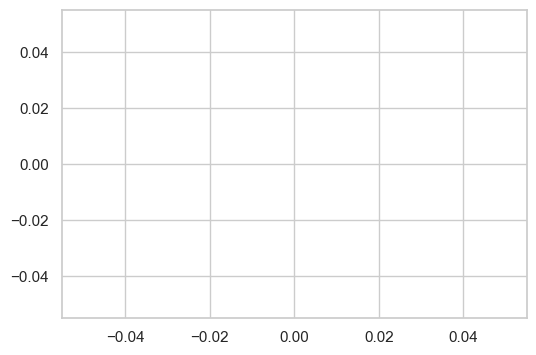

In [ ]:

# 7. Univariate Analysis
# Numerical
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


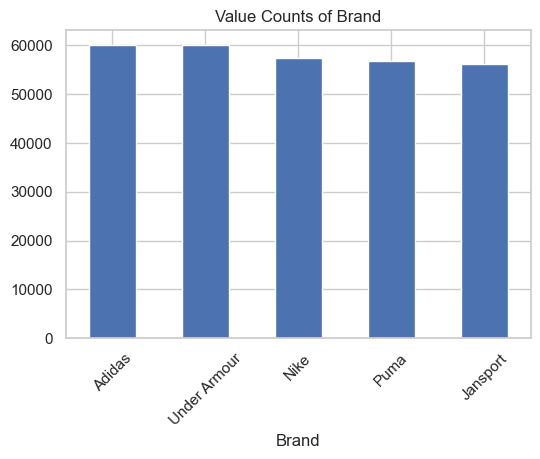

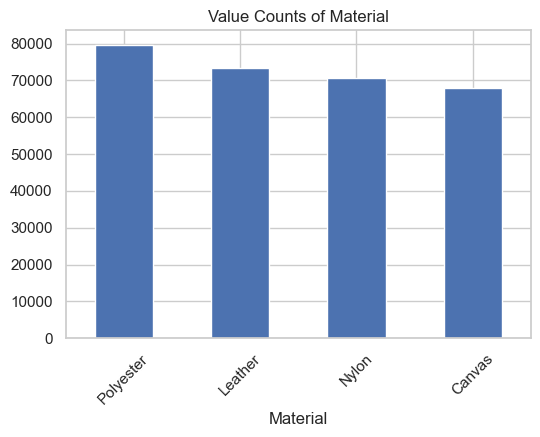

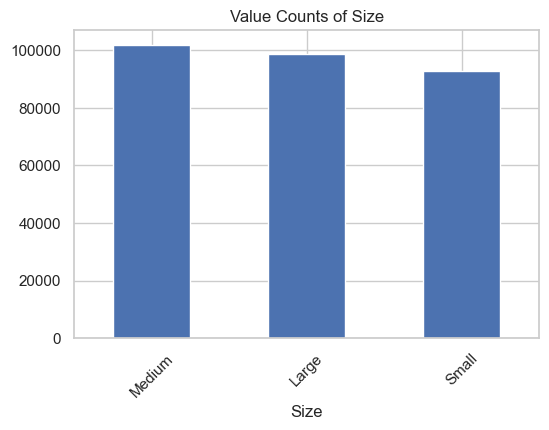

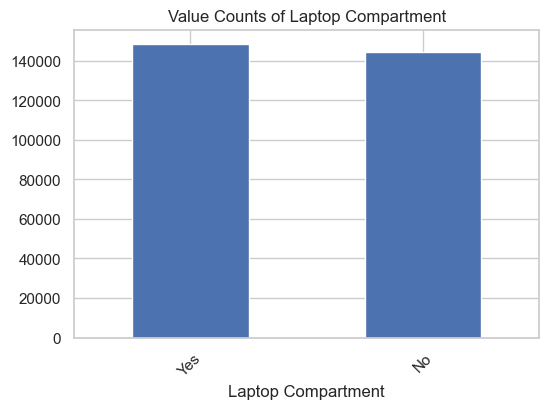

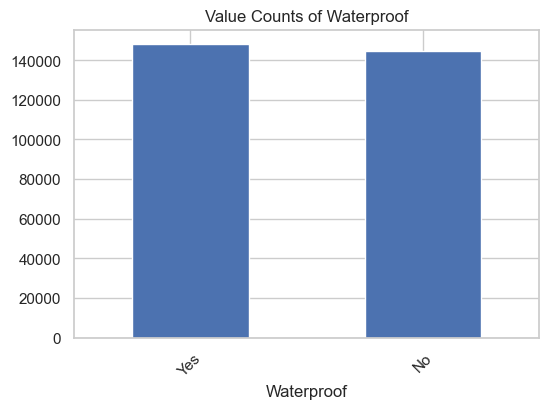

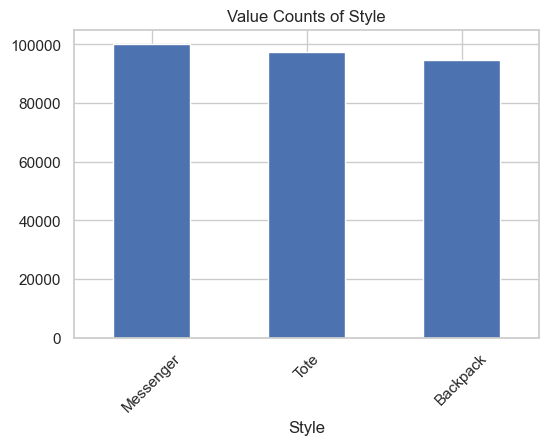

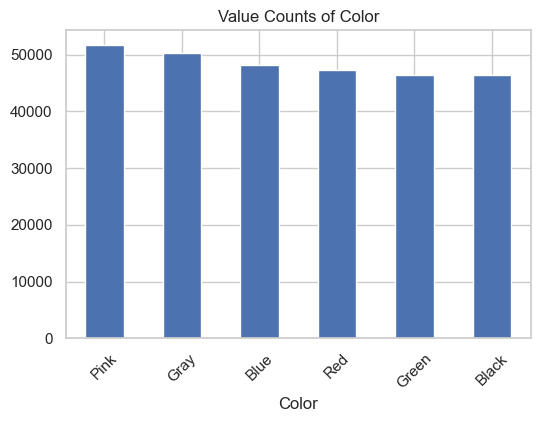

In [ ]:

# Categorical
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Value Counts of {col}')
    plt.xticks(rotation=45)
    plt.show()


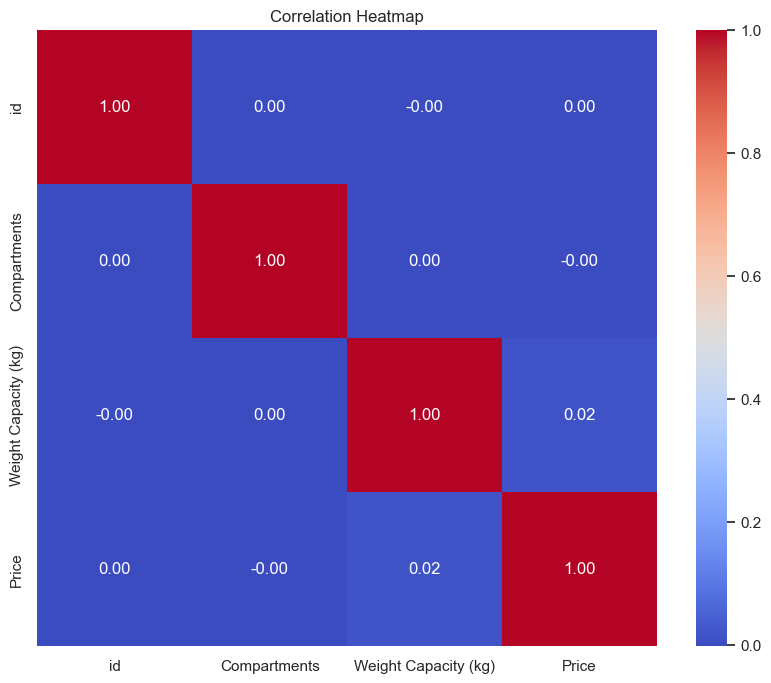

In [ ]:

# 8. Bivariate Analysis
# Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


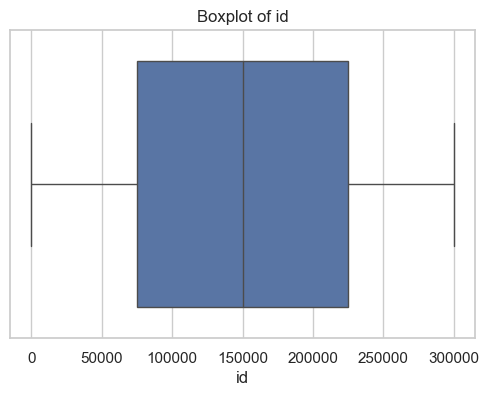

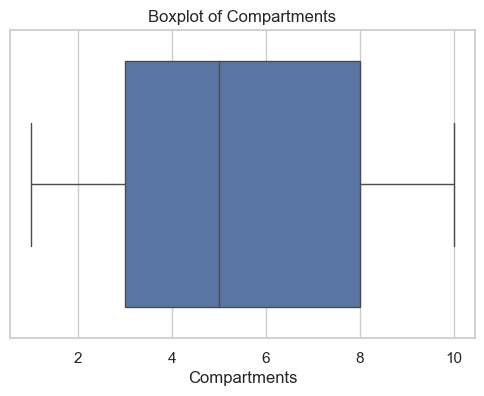

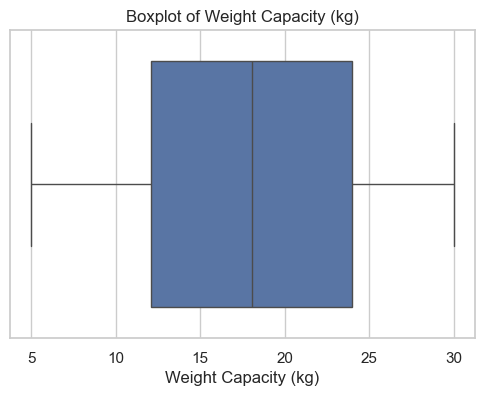

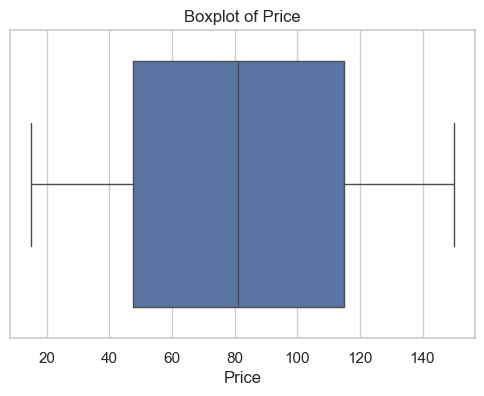

In [ ]:

# 9. Outlier Detection
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


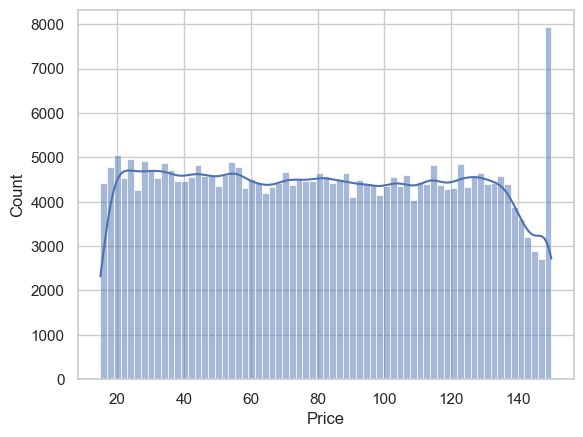

In [ ]:

# 11. Target Distribution
target = "Price"
if target in df.columns:
    if df[target].dtype == 'object':
        df[target].value_counts().plot(kind='bar', title="Target Distribution")
    else:
        sns.histplot(df[target], kde=True)
    plt.show()


## Data Preprocessing

In [ ]:
# df = df.dropna()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.metrics import root_mean_squared_error, r2_score, roc_auc_score

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [90]:
# Split train data
X = df.drop(columns=['Price', 'id'])
Y = df['Price']

In [97]:
# Get numerical columns automatically
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.difference(cat_cols).tolist()

# Numerical pipeline: impute missing with mean
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Categorical pipeline: impute with most frequent, then encode
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

# Column transformer: combine both pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, cat_cols)
])

# Final pipeline (can remove classifier if just preprocessing)
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
])

# Fit the pipeline
X_encoded = pipeline.fit_transform(X, Y)


In [154]:
# Separate training and testing data
x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=42)

##### XGBRegressor

In [155]:
#Define the model Multivariate Linear Regression
xgb = XGBRegressor()

# Train the model
model = xgb.fit(x_train, y_train)

In [156]:
#y-intercept of the model
model.intercept_

array([81.68807], dtype=float32)

In [157]:
model.score(x_train, y_train)

0.05568479313776331

In [158]:
preds = model.predict(x_test)

In [159]:
root_mean_squared_error(y_test, preds)

39.130796602489454

#### Multi Layer Perceptron Regressor

In [160]:
regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
regr.fit(x_train, y_train)

MLPRegressor(max_iter=2000, random_state=1, tol=0.1)

In [161]:
regr.score(X_encoded, Y)

0.0012539945449560053

In [162]:
preds = regr.predict(x_test)

In [163]:
root_mean_squared_error(y_test, preds)

38.87423139820244

In [164]:
r2_score(y_test, preds)

0.000744036147265148

#### Linear Regression